In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from keras.datasets import cifar100
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize the data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding for CIFAR-100 (100 classes)
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Verify the shapes of the data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [ ]:
from keras.datasets import cifar100

# Load and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Define the class labels for CIFAR-100 (fine-grained categories)
from keras.datasets.cifar100 import load_data
class_labels =class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
]


# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding for CIFAR-100
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,708 (3.62 MB)

 Trainable params: 947,812 (3.62 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


NameError: name 'y_test_one_hot' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0067 - loss: 4.6079
Test Loss: 4.6073527336120605, Test Accuracy: 0.006800000090152025


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(x_train)

Model file not found: best_cifar100_model.keras


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)





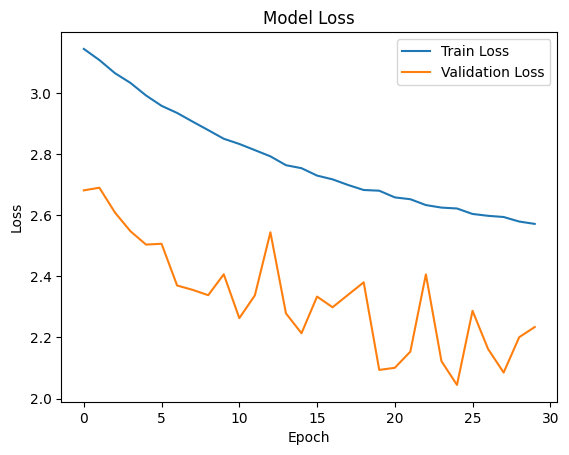

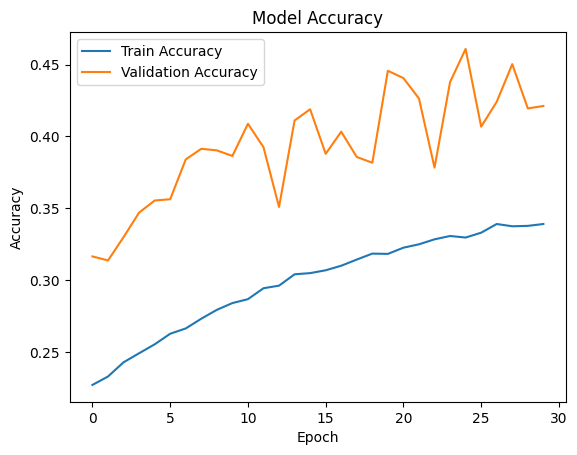

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 1s - 5ms/step - accuracy: 0.4609 - loss: 2.0446
Test Accuracy: 46.09%
Test Loss: 2.0446


In [ ]:
# Save the model in the Keras format
model.save('final_cifar100_model.keras')

# (Optional) Save in HDF5 format for compatibility with older tools
model.save('final_cifar100_model.h5', save_format='h5')


In [ ]:
import os

img_path = r"C:\Users\Admin\Downloads\pomerian.jpg"
if os.path.exists(img_path):
    print("Image file found.")
else:
    print("Image file not found.")


Image file not found.


In [ ]:
class_names = [
    "apple", "aquarium_fish", "orange", "orchid", "otter", "pencil", "pickup_truck",
    "pine_tree", "plane", "plasma_tv", "polecat", "porcupine", "possum", "radios",
    "ray", "red", "red_panda", "refrigerator", "rocket", "rose", "seal", "shark",
    "shoes", "skyscraper", "snake", "spider", "squirrel", "starfish", "strawberry",
    "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television",
    "tiger", "toaster", "train", "tree", "trumpet", "turtle", "watermelon", "watch",
    "wheat", "window", "zebra", "backpack", "barbell", "baseball_bat", "baseball_glove",
    "bed", "bench", "bicycle", "book", "bottle", "bowl", "bracelet", "brassiere", "bread",
    "broccoli", "broom", "cake", "can", "candle", "cannon", "car", "carrot", "cell_phone",
    "chandelier", "clothes", "cloud", "comb", "computer_keyboard", "couch", "cup", "desk",
    "diamond", "dog", "doll", "donut", "door", "drum", "elephant", "fish", "flashlight",
    "fork", "frying_pan", "guitar", "hamburger", "handbag", "hat", "headphones", "horse",
    "hotdog", "keyboard", "kitchen", "knife", "lamp", "laptop", "leaf", "lemon", "lightbulb",
    "line", "lollipop", "luggage", "mouse", "mug", "music_box", "necklace", "nail", "orange",
    "palm_tree", "pan", "parachute", "parrot", "pen", "piano", "pickup_truck", "pillow",
    "pineapple", "plane", "plate", "plow", "pocket_watch", "pot", "pretzel", "printer", "purse",
    "rail", "rocket", "rose", "scissors", "shovel", "skateboard", "skull", "sofa", "spoon",
    "spray_bottle", "squirrel", "starfish", "strawberry", "suitcase", "swimming_trunks", "table",
    "television", "tennis_ball", "toaster", "toilet", "train", "truck", "umbrella", "vase",
    "violin", "washer", "water_bottle", "watermelon"
]


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
def predict_new_image(image_obj, model, class_labels):
    try:
        # Load and preprocess the uploaded image object (Streamlit image uploader)
        img = image_obj.resize((32, 32))  # Resize the image to match model input size (32x32)
        img_array = image.img_to_array(img)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize the image

        # Make prediction with the model
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]  # Get predicted class index
        confidence = np.max(prediction)  # Get confidence score

        # Display prediction results
        st.write(f"Predicted Class: {class_labels[predicted_class]}")
        st.write(f"Confidence: {confidence * 100:.2f}%")

    except Exception as e:
        st.write(f"Error: {str(e)}")


In [ ]:
from keras.models import load_model
model.save('final_cifar100_model.h5')

In [ ]:
from google.colab import files
files.download('final_cifar100_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>